# Plot of complex L1-norm solution

This notebook plots the validation test for multiple inversions and the solution which produces the smallest goal function value for the L1-norm code.

In [34]:
import numpy as np
import matplotlib as mpb
import cPickle as pickle

# show the figures in windows

# show all the matplotlib backends 
#mpb.rcsetup.all_backends

# force matplotlib to use the 'Qt5Agg' backend 
#mpb.use(arg='Qt5Agg', force=True)

In [35]:
# importing my functions
import sys
sys.path.insert(0, '../../code')

import mag_polyprism_functions as mfun

In [36]:
# importing the pickle file of results
result_path = 'l1-tfa-inversion/multiple-44675/'

with open(result_path+'inversion.pickle') as w:
        inversion = pickle.load(w)
        
with open('../inclined/model.pickle') as w:
        model = pickle.load(w)

In [37]:
inversion['regularization']

array([1.e-04, 1.e-04, 0.e+00, 0.e+00, 1.e-06, 1.e-07, 1.e-05])

In [38]:
inversion['intial_r']

700.0

In [39]:
inversion['results'][9][2][-1][-1].z2

2912.3344828100016

In [26]:
model

{'L': 8,
 'M': 20,
 'P': 176,
 'dec': 9.0,
 'dz': 380.0,
 'inc': -50.0,
 'intensity': 12.0,
 'prisms': [<fatiando.mesher.PolygonalPrism at 0x7f73e166f050>,
 'props': {'magnetization': array([ 7.61848593,  1.20664963, -9.19253332])},
 'z0': 0.0}

In [27]:
# directory to save the figures
filename = '../../manuscript/Figs/great-l1-solution.png'
#filename = ''

In [28]:
z0 = inversion['z0']
intensity = inversion['intensity']
z0_plot, int_plot = np.meshgrid(z0, intensity)
z0_plot = z0_plot.ravel()
int_plot = int_plot.ravel()
n = z0.size
m = intensity.size
N = inversion['x'].size

In [29]:
# building the matrix of the goal function
gamma_matrix = mfun.goal_matrix(n, m, inversion['results'])

In [30]:
np.min(gamma_matrix)

8.285688116317939

In [31]:
np.argmin(gamma_matrix)

9

In [32]:
# parameters for the figure
vmin = int(np.min(gamma_matrix))
vmax = 10.
solutions = [[1,3]]
norm = 1
figsize = (4.33, 4.33)
inset_position = (0.5, 0.95)
dpi = 1200
truevalues = [0,2]
angles= [5, 37, 2, -150]
area = [-1.,6.,-2.5,2.]
model = model['prisms']
inter = False

# Figures

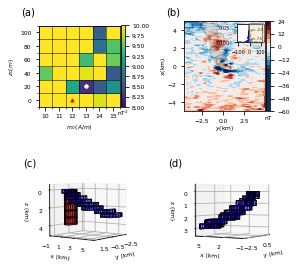

In [33]:
mfun.plot_synthetic_solution(
    inversion['x'], inversion['y'],
    inversion['z'], inversion['results'][9][3],
    inversion['results'][9][2][-1],
    inversion['results'][9][2][0],
    z0, intensity, gamma_matrix, vmin,
    vmax, solutions, norm, figsize,
    inset_position, dpi,
    truevalues, angles, area, model,
    filename, inter
)